### Jian Wang  204357764  STAT C283

# Midterm-2  Problem-8,  multi-index model
## Uncorrelated index decomposition
### (Goal) Given market and index $R_{mt}, I^*_{1t} , I^*_{2t} $ ,  find new index $I_{1t}, I_{2t}$ such that  $R_{mt}, I_{1t} , I_{2t} $ are uncorrelated

### (Step1)  Perform the regression of $I^*_{1t}$ on $R_{mt}$
$$  I^*_{1t} = a + b R_{mt} + d_t $$
$$  I_{1t} := d_t           $$

### (Step2) Perform the regression of $I^*_{2t}$ on $R_{mt}$ and $ I_{1t} $
$$  I^*_{2t} = e + f R_{mt} + g I_{1t} + h_t $$
$$  I_{2t} := h_t           $$

### (Step3)  Now given any stock $R_{it}$, we can perform linear regression on either $ R_{mt}, I_{1t}$ or $ R_{mt}, I_{1t} , I_{2t} $
$$  R_{it} = \alpha_i + \beta_{im} R_{mt} + \beta_{i1} I_{1t} + \epsilon_{it} $$
$$  R_{it} = \alpha_i + \beta_{im} R_{mt} + \beta_{i1} I_{1t} + \beta_{i2} I_{2t} +  \epsilon_{it} $$

# (1) Load the data from high-tech industry 
## Market is SP500,  Index 1 is the average five company stocks, Index 2 is the price of market

In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

s = pd.read_csv("problem8.csv") 
print(s.columns.tolist())

SP500 = s["^GSPC"].values

N = len(SP500)
R_mt = (SP500[1:] - SP500[:-1])/SP500[:-1]


R_AAPL = (s["AAPL"].values[1:] - s["AAPL"].values[:-1])/s["AAPL"].values[:-1]
R_AMZN = (s["AMZN"].values[1:] - s["AMZN"].values[:-1])/s["AMZN"].values[:-1]
R_GOOG = (s["GOOG"].values[1:] - s["GOOG"].values[:-1])/s["GOOG"].values[:-1]
R_MSFT = (s["MSFT"].values[1:] - s["MSFT"].values[:-1])/s["MSFT"].values[:-1]
R_IBM = (s["IBM"].values[1:] - s["IBM"].values[:-1])/s["IBM"].values[:-1]


Istar_1t = ( R_AAPL+ R_AMZN + R_GOOG + R_MSFT + R_IBM ) / 5 
Istar_2t = SP500[1:] /  SP500[0] / 8

['Unnamed: 0', 'Date', '^GSPC', 'AAPL', 'AMZN', 'GOOG', 'MSFT', 'IBM']


# (2) Uncorrelated index decomposition

In [169]:
import numpy as np
from sklearn.linear_model import LinearRegression

def reduce_1( R_mt, Istar_1t):
    # inputs are ndarray type,  1 dimension
    # output is ndarray type, 1 dimension
    n = len(R_mt)
    X = R_mt.reshape( (n,1) )
    reg = LinearRegression().fit( X ,  Istar_1t )
    output =[0] * n
    for i in range(n):
        XX = X[i].reshape( (1,1) )
        value = Istar_1t[i] - reg.predict( XX  )
        output[i] = value[0]
    return np.array(output)

def reduce_2( R_mt, I_1t , Istar_2t):
    # inputs are ndarray type,  1 dimension
    # output is ndarray type, 1 dimension
    n = len(R_mt)
    X = np.ndarray( (n,2) )
    for i in range(n):
        X[i,0] = R_mt[i]
        X[i,1] = I_1t[i]
    
    reg = LinearRegression().fit( X ,  Istar_2t )
    output =[0] * n
    for i in range(n):
        XX = X[i].reshape( (1,2) )
        value = Istar_2t[i] - reg.predict( XX  )
        output[i] = value[0]
    return np.array(output)

## Run the function

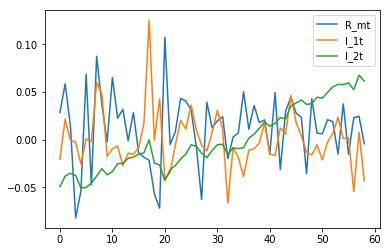

In [170]:
I_1t = reduce_1(R_mt , Istar_1t)
I_2t = reduce_2( R_mt, I_1t , Istar_2t)


plt.plot(R_mt)
plt.plot(I_1t)
plt.plot(I_2t)
plt.legend(labels=["R_mt","I_1t","I_2t"])

plt.show()

## Variance- Covariance Matrix among { Market, Index 1, Index 2 }

###  Before Decompostion

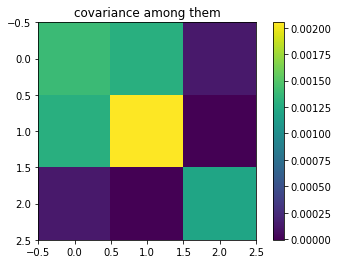

[[  1.39502238e-03   1.29178192e-03   1.36218308e-04]
 [  1.29178192e-03   2.05058597e-03  -5.86107188e-06]
 [  1.36218308e-04  -5.86107188e-06   1.20277147e-03]]


In [171]:
RIstar12 = np.cov([R_mt, Istar_1t, Istar_2t] )
plt.imshow(RIstar12)
plt.title("covariance among them")
plt.colorbar()
plt.show()
print(RIstar12)

### After Decompostion

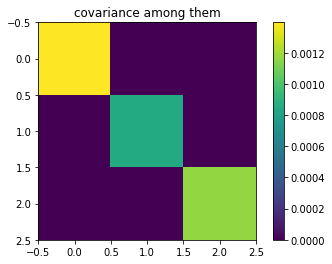

[[  1.39502238e-03   3.34607222e-19   0.00000000e+00]
 [  3.34607222e-19   8.54404066e-04   2.24317691e-20]
 [  0.00000000e+00   2.24317691e-20   1.16907764e-03]]


In [172]:
RI12 = np.cov([R_mt, I_1t, I_2t] )
plt.imshow(RI12)
plt.title("covariance among them")
plt.colorbar()
plt.show()
print(RI12)

# (3) Bench marking test 

In [173]:
def get_R2_twoIndex( R_mt, I_1t, I_2t ):
    # inputs are ndarray type,  1 dimension
    # output is ndarray type, 1 dimension
    n = len(R_mt)
    X = np.ndarray( (n,2) )
    for i in range(n):
        X[i,0] = R_mt[i]
        X[i,1] = I_1t[i]
    
    output = []
    for y in [R_AAPL , R_AMZN , R_GOOG , R_MSFT , R_IBM ]:
        reg = LinearRegression().fit( X , y)
        s = reg.score(X, y)
        output.append(s)
    return output
    
    

def get_R2_threeIndex( R_mt, I_1t, I_2t ):
    # inputs are ndarray type,  1 dimension
    # output is ndarray type, 1 dimension
    n = len(R_mt)
    X = np.ndarray( (n,3) )
    for i in range(n):
        X[i,0] = R_mt[i]
        X[i,1] = I_1t[i]
        X[i,2] = I_2t[i]
    
    output = []
    for y in [R_AAPL , R_AMZN , R_GOOG , R_MSFT , R_IBM ]:
        #print(y)
        reg = LinearRegression().fit( X , y)
        s = reg.score(X, y)
        output.append(s)
    return output

### The x-axis are five stocks ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'IBM']
### The y-axis are R square score
### Orange curve is three index model, which fits better.

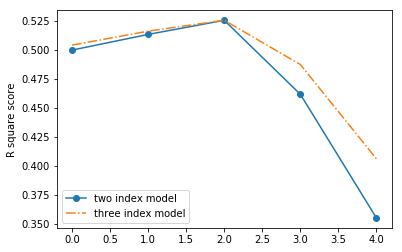

In [174]:
s2 = get_R2_twoIndex( R_mt, I_1t, I_2t )
s3 = get_R2_threeIndex( R_mt, I_1t, I_2t )

plt.plot(s2,'-o')
plt.plot(s3,'-.')
plt.legend(labels=["two index model","three index model"])
plt.ylabel("R square score")

plt.show()